# 1. Linear SVM

<font color='red'>Assignment:</font> Load the data in "../data/svm.csv" into a DataFrame.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/svm.csv')

In [3]:
df.head()

,x1,x2,y
0,0.800295,0.074122,1
1,2.080688,1.987278,0
2,0.981368,0.164505,1
3,2.094340,1.477435,0
4,1.686915,1.081737,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [5]:
df.describe()

,x1,x2,y
count,200.000000,200.000000,200.000000
mean,1.641280,1.546318,0.250000
std,0.813070,0.857156,0.434099
min,-0.151139,-0.175457,0.000000
25%,1.191527,1.106901,0.000000
50%,1.697635,1.612358,0.000000
75%,2.276622,2.235199,0.250000
max,2.894375,2.981318,1.000000


<font color='red'>Assignment:</font> Import **SVC** from sklearn, and train a SVM classifier using **Linear Kernel** to predict y with **x1** and **x2**. No need to hold out a test set this time.

In [8]:
features = list(df.columns)
target = 'y'
features.remove(target)
X = df[features]
y = df[target]

In [9]:
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')

svc_linear.fit(X,y)

SVC(kernel='linear')

<font color='red'>Assignment:</font> Find out the **support vectors** and plot them together with data points.

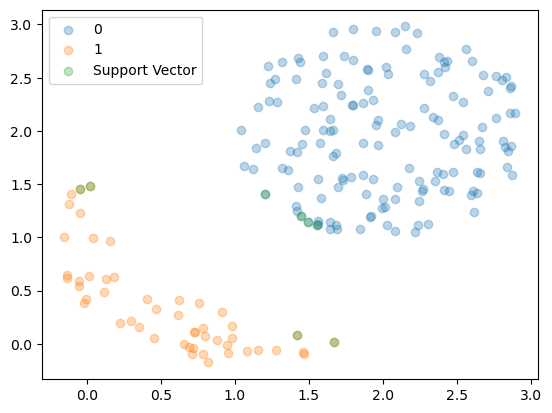

In [22]:
df_0=df[df['y']==0]
df_1=df[df['y']==1]

import matplotlib.pylab as plt
%matplotlib inline

plt.scatter(df_0['x1'], df_0['x2'], alpha=0.3, label = '0')
plt.scatter(df_1['x1'], df_1['x2'], alpha=0.3, label = '1')
plt.scatter(svc_linear.support_vectors_[:,0], svc_linear.support_vectors_[:,1], alpha=0.3, label = 'Support Vector')
plt.legend()

<font color='red'>Question:</font> What are support vectors?

In [ ]:
# Support vectors are data points close to the hyperplane and they influence the position and orientation of the hyperplane.

<font color='red'>Question:</font> How many support vectors in this model? Where do they locate?

In [ ]:
# There are 8 support vectors, they are at the edge of two clusters and close to the blank margin between two clusters.

<font color='red'>Assignment:</font> Change hyper parameter **C** and find out how the number and locations of support vectors are affected.

In [ ]:
# Decreasing C will increase the number of support vectors which locate more far away from the margin between two clusters.

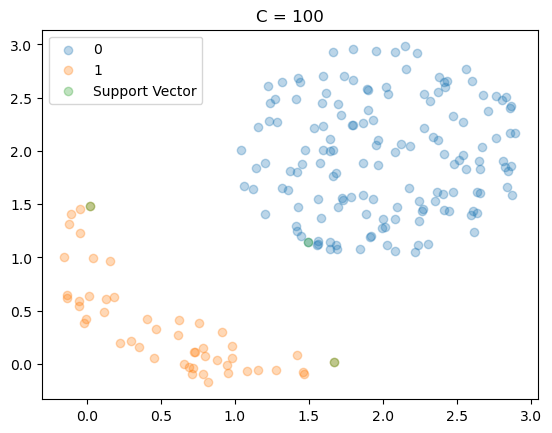

In [32]:
# change C to be very big 100 compared to the default 1

svc_linear = SVC(kernel='linear', C=100)

svc_linear.fit(X,y)

plt.title('C = 100')
plt.scatter(df_0['x1'], df_0['x2'], alpha=0.3, label = '0')
plt.scatter(df_1['x1'], df_1['x2'], alpha=0.3, label = '1')
plt.scatter(svc_linear.support_vectors_[:,0], svc_linear.support_vectors_[:,1], alpha=0.3, label = 'Support Vector')
plt.legend()

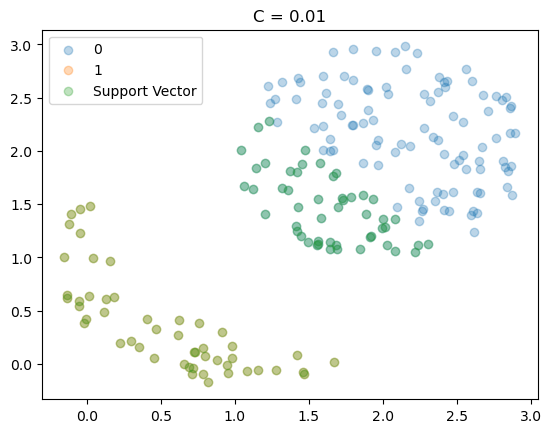

In [33]:
# change C to be very small 0.01 compared to the default 1

svc_linear = SVC(kernel='linear', C=0.01)

svc_linear.fit(X,y)

plt.title('C = 0.01')
plt.scatter(df_0['x1'], df_0['x2'], alpha=0.3, label = '0')
plt.scatter(df_1['x1'], df_1['x2'], alpha=0.3, label = '1')
plt.scatter(svc_linear.support_vectors_[:,0], svc_linear.support_vectors_[:,1], alpha=0.3, label = 'Support Vector')
plt.legend()

<font color='red'>Question:</font> When **C** is relatively small (e.g. 0.01), how many support vectors in positive and negative classes, respectively? Do you see any problem with that?

In [34]:
svc_linear.n_support_

array([50, 50])

In [ ]:
# both have 50 support vectors.So all the positive data points are support vectors now.

<font color='red'>Assignment:</font> Balance the classes (using **class_weight**), re-train the model, and find out the change of support vector numbers in positive and negative classes.

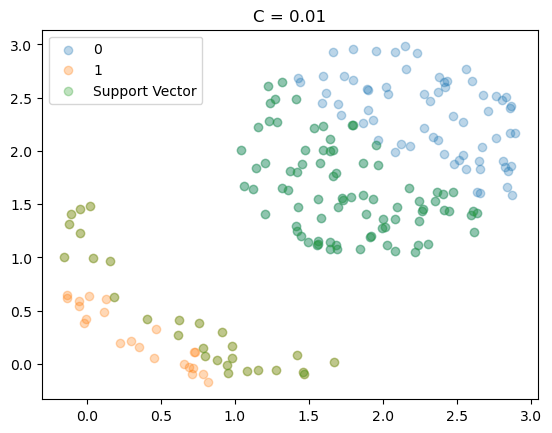

In [35]:
# change C = 0.01, using balanced weight

svc_linear = SVC(kernel='linear', C=0.01, class_weight='balanced')

svc_linear.fit(X,y)

plt.title('C = 0.01')
plt.scatter(df_0['x1'], df_0['x2'], alpha=0.3, label = '0')
plt.scatter(df_1['x1'], df_1['x2'], alpha=0.3, label = '1')
plt.scatter(svc_linear.support_vectors_[:,0], svc_linear.support_vectors_[:,1], alpha=0.3, label = 'Support Vector')
plt.legend()

In [36]:
# the number of SVs are now roughly proportional to the number of each class now.

svc_linear.n_support_


array([83, 28])

<font color='red'>Question:</font> Is SVM sensitive to base rate? Why?

In [ ]:
# Yes, SVM is sensitive to base rate. In most of the pratical cases, the two class can't be perfectly separated into two 
# distinct clusters, so some data points appear in the wrong side of the boudary. The SVM algorithm regularizes this violation 
# (by the hyperparameter C in above). When the regularization weights equally for both class, the decision boudary is in favor
# of the major class.

<font color='red'>Question:</font> What is a hyperplane?

In [ ]:
# Hyperplane are decision boudaries that help classify data points.

<font color='red'>Question:</font> What is the optimal hyperplane for a SVM model?

In [ ]:
# In SVM model, optimal hyperplane is the one that maximize the overall distance from itself to the support vectors.

<font color='red'>Question:</font> What is the difference between hard margin and soft margin? Which margin was adopted in the above model?

In [ ]:
# A hard margin in SVM is to find an optimal hyperplane without allowing mis-classification. Soft margin allows mis-
# classification but uses loss functions on the mis-classification to regularize them.
# The above data set has a clear boundary to perfectly separate the two classes, a hard margin should be used.


<font color='red'>Question:</font> What is hinge loss?

In [ ]:
# Hinge loss the common loss function used in soft margin.
# The loss of a misclassified point is called a slack variable (which could be thought as the distance from the point to the 
# hyperplane of the cluster it should belong to)

<font color='red'>Question:</font> What is the difference between SVM and Logistic Regression? What are the pros and cons of these two algorithm?

In [ ]:
# 1 SVM finds the best margins that separated the classes, which reduces the risk of misclassification. Logistic regression does
# not provide the best margins, instead it has different decision boundaries depending the weights/thresholds.
# 2 SVM works with unstructed and semi-structed data like text and images. Logistic regression works with already defined 
# independent variables.
# 3 SVM is based of geometrical properties of the data, Logistic regression is based on statistical approaches.
# 4 SVM is less vulerable to over-fitting than Logistic regression.

# pros of SVM:
# 1 The regularization parameter helps preventing over-fitting
# 2 The kernel option to adapt classify many non-linear structions.
# 3 SVM is defined by a convex optimisation problem to fit the parameters.
# 4 It is an approximation to a bound on the test error rate.
# cons of SVM:
# 1 the kernel version of SVM is sensitive to over-fitting
# 2 SVM does not provide probability of membership like Logistic regression.

# Pros of Logistic regression
# 1 It is easy to implement and interpret.
# 2 It can interpret model coefficients as indicators of feature importance.
# 3 It provides probability of membership.
# Cons
# 1 If the number of observations is lesser than the number of features, Logistic Regression should not be used.
# 2 It only constructs linear boundaries.
# 3 Logistic Regression requires average or no multicollinearity between independent variables.

<font color='red'>Question:</font> Given a data set with many columns and a relatively small amount of rows, which algorithm could be better? SVM or Logistic Regression?

In [ ]:
# SVM is the choice. Logistic Regression will lead to overfitting in such a case.

# 2. Non-Linear SVM

**Example:** SVM visualization class

In [37]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline


class svm_visualization(object):
    
    def __init__(self, model, data):
        self.model = model
        self.data = data
        xrange = df.x1.max() - df.x1.min()
        yrange = df.x2.max() - df.x2.min()
        self.xmin = df.x1.min() - 0.1 * xrange
        self.xmax = df.x1.max() + 0.1 * xrange
        self.ymin = df.x2.min() - 0.1 * yrange
        self.ymax = df.x2.max() + 0.1 * yrange
        
    def show(self):
        self.plot_contour()
        self.plot_data()
        self.plot_sv()
        try:
            self.plot_boundry()
        except:
            print('Warning: No boundry is available!')
        plt.xlim(self.xmin, self.xmax)
        plt.ylim(self.ymin, self.ymax)

    def plot_data(self):
        df = self.data
        plt.scatter(df[df.y==0]['x1'], df[df.y==0]['x2'], alpha=0.5)
        plt.scatter(df[df.y==1]['x1'], df[df.y==1]['x2'], alpha=0.5)
        return plt
    
    def plot_sv(self):
        indices = self.model.support_
        svs = self.model.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], facecolors='none', edgecolors='r')
        return plt
    
    def plot_boundry(self):
        w = self.model.coef_[0]
        a = -w[0] / w[1]
        x = np.linspace(self.xmin, self.xmax)
        y = a * x - (self.model.intercept_[0]) / w[1]
        plt.plot(x, y, ls='--', c='k')
        return plt
    
    def plot_contour(self):
        x = np.linspace(self.xmin, self.xmax, 30)
        y = np.linspace(self.ymin, self.ymax, 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        Z = self.model.decision_function(xy).reshape(X.shape)
        z_bound = 3*max(abs(Z.min()), abs(Z.max()))
        plt.contourf(X, Y, Z, 50, cmap='bwr', vmin=-z_bound, vmax=z_bound)
        plt.colorbar()
        return plt

**Example:** Visualize linear SVM model. The dash line (only appears in linear models) indicates the decision boundry, and the contour indicates how confidently the prediction of a class.

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


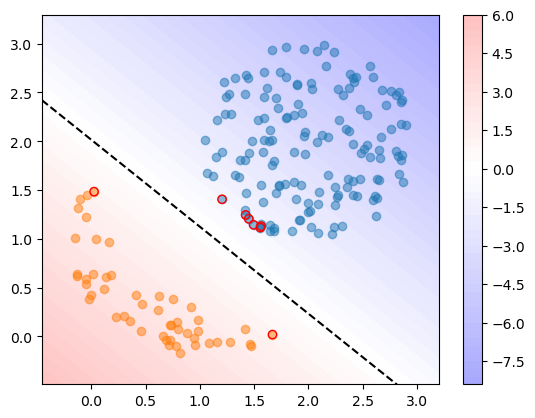

In [40]:
svc_linear = SVC(kernel='linear', class_weight='balanced')
svc_linear.fit(X,y)

sv = svm_visualization(svc_linear, df)
sv.show()

<font color='red'>Assignment:</font> Try **rbf** and **poly** kernels.

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


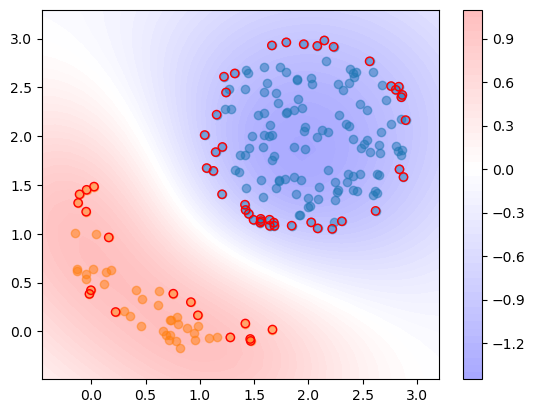

In [48]:
svc_linear = SVC(kernel='rbf', C=0.1, class_weight='balanced')
svc_linear.fit(X,y)

sv = svm_visualization(svc_linear, df)
sv.show()

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


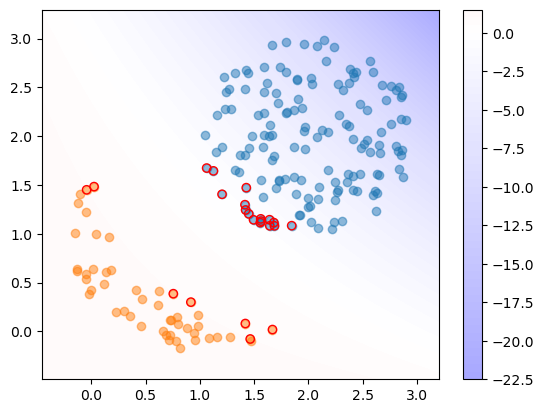

In [51]:
svc_linear = SVC(kernel='poly', degree=3, C=0.01, class_weight='balanced')
svc_linear.fit(X,y)

sv = svm_visualization(svc_linear, df)
sv.show()

<font color='red'>Question:</font> How do these two kernels work? Where do the support vectors locate, respectively?

In [ ]:
# A kernel function takes its input vectors in the original space and returns the dot products of the vectors in the feacture
# space.
# The rbf kernel function uses a radial base function
# The poly kernel uses a polynomial function
# In rbf kernel the SVs locates around the outside the cluster
# The poly kernel yields SVs near the edge between the margin of two cluster.